# Experiments With Autoencoders

Trying to encode and decode digits and analyse the output of the hidden layers

## Imports

In [1]:
cd ../../

/mnt/c/Users/victo/Documents/Repos/neural-networks


In [2]:
from utils.data_manipulation import Data
from utils.data_visualization import DataViz
from utils.model import ModelUtils

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

## Dataset Visualization

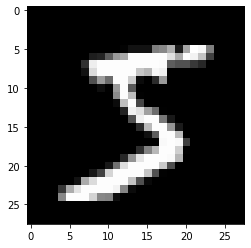

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0], cmap="gray")
plt.show()

In [5]:
def flatten_all(input_data):
    new_data = []
    for data in input_data:
        new_data.append(data.flatten())
    return np.array(new_data)

x_train = flatten_all(Data.normalize_data(x_train, 255))
x_test = flatten_all(Data.normalize_data(x_test, 255))

input_shape = x_train[0].shape[0]

## Functions

In [16]:
# Creates the model reference for training an usage
def create_model(input_dim, encoder_layer_details, decoder_layer_details, optimizer, loss="mean_squared_error", metrics=None):
    input_layer = [Input(shape=(input_dim,), name="input")]
    output_layer = [Dense(units=input_dim, activation="sigmoid", name="output")]
    
    encoder = create_layer(encoder_layer_details)
    decoder = create_layer(decoder_layer_details)
    layers = input_layer + encoder + decoder + output_layer
    model = tf.keras.Sequential(layers)
    model.compile(loss=loss, optimizer=optimizer)
    
    return model

# Creates a list of Dense layers based on a list of dictionaries containing the args
def create_layer(layer_details):
    return [Dense(**layer_detail) for layer_detail in layer_details]    

# Trains the model
def run_model(model, epochs, batch_size, x_train, x_test):
    model_train = model.fit(
        x_train, x_train,
        epochs=epochs,
        batch_size=batch_size,
        shuffle=True,
        validation_data=(x_test, x_test))
    DataViz.plot_loss(
        model_train.history['loss'],
        model_train.history['val_loss'],
        range(epochs)
    )
    
# Plots the input data on the top row and the reconstructed data on the lower row
def plot_compare(model, x_test, examples=10):
    decoded_imgs = model.predict(x_test)
    plt.figure(figsize=(20, 4))
    for i in range(examples):
        ax = plt.subplot(2, examples, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, examples, i + 1 + examples)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
# Plots the weights of each neuron of the first layer as a 28x28 image
def plot_hidden_rep(model, examples=10):
    images = map_values_to_range(map_weights_to_images(model))
    plt.figure(figsize=(20, 4))
    for i in range(examples):
        ax = plt.subplot(2, examples, i + 1)
        plt.imshow(images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, examples, i + 1 + examples)
        plt.imshow(images[i + examples].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
# Maps the weights of each neuron to an array
def map_weights_to_images(model):
    images = []
    weights = model.get_weights()[0]
    for neuron in range(len(weights[0])):
        images.append(np.array([weights[input_dot][neuron] for input_dot in range(len(weights))]))
    
    return images

# Transforms the values of an array to the [0,255] interval
def map_values_to_range(values):
    new_values = []
    for images in values:
        new_values.append(
            np.array((images - np.min(images)) / (np.max(images) - np.min(images)) * 255)
        )
    
    return new_values

epochs = 50
batch_size = 64

## Models

All models will run with the same number of epochs, batch size, activations and input.

### Model 1
Model details:
- 3 hidden layers
  - 16 -> 8 -> 16

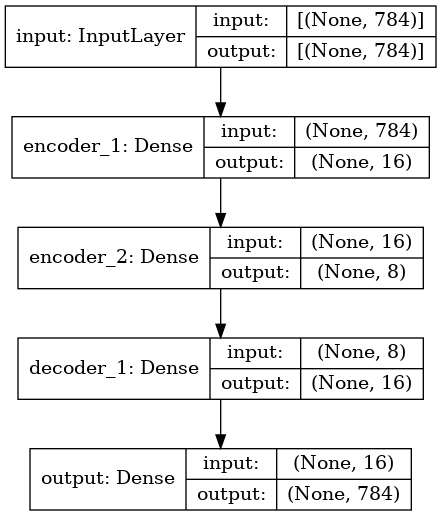

In [7]:
encoder_layer = [
    {
        "units": 16,
        "activation": "relu",
        "name": "encoder_1"
    },
    {
        "units": 8,
        "activation": "relu",
        "name": "encoder_2"
    },
]

decoder_layer = [
    {
        "units": 16,
        "activation": "relu",
        "name": "decoder_1"
    }
]

model = create_model(input_shape, encoder_layer, decoder_layer, "Adam")
plot_model(model, show_shapes=True)

Epoch 1/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0846 - val_loss: 0.0416
Epoch 2/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0408 - val_loss: 0.0378
Epoch 3/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0377 - val_loss: 0.0360
Epoch 4/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0361 - val_loss: 0.0350
Epoch 5/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0353 - val_loss: 0.0344
Epoch 6/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0346 - val_loss: 0.0338
Epoch 7/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0342 - val_loss: 0.0332
Epoch 8/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0336 - val_loss: 0.0328
Epoch 9/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0333 - val_loss: 0.0325
Epoch 10/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0329 - val_loss: 0.0323

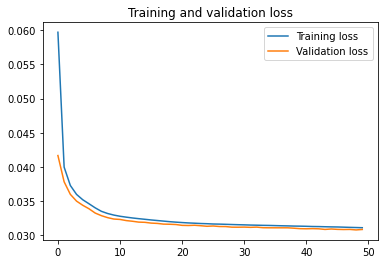

In [8]:
run_model(model, epochs, batch_size, x_train, x_test)

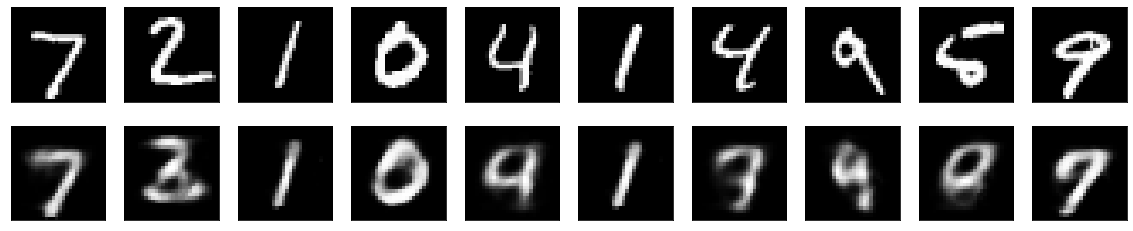

In [11]:
## Comparison betwen original images (above) and their respective reconstructions (bellow)

plot_compare(model, x_test)

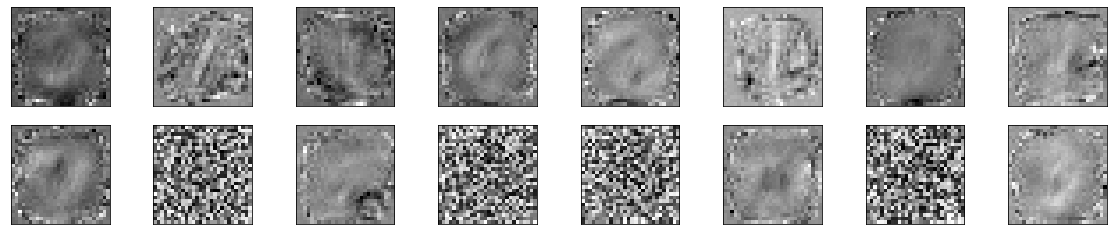

In [17]:
## Hidden layer visualization

plot_hidden_rep(model, examples=8)

### Model 2
Model details:
- 3 hidden layers
  - 32 -> 16 -> 32

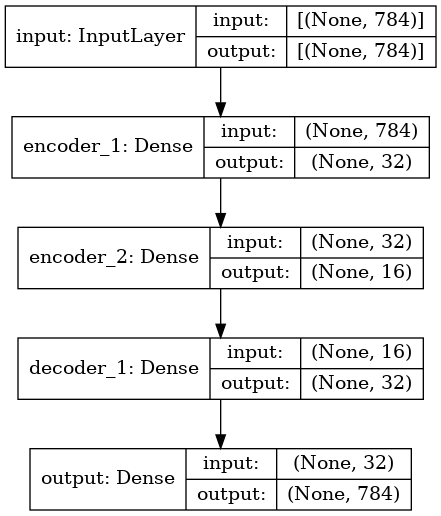

In [19]:
encoder_layer = [
    {
        "units": 32,
        "activation": "relu",
        "name": "encoder_1"
    },
    {
        "units": 16,
        "activation": "relu",
        "name": "encoder_2"
    },
]

decoder_layer = [
    {
        "units": 32,
        "activation": "relu",
        "name": "decoder_1"
    }
]

model = create_model(input_shape, encoder_layer, decoder_layer, "Adam")
plot_model(model, show_shapes=True)

Epoch 1/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0735 - val_loss: 0.0329
Epoch 2/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0309 - val_loss: 0.0265
Epoch 3/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0265 - val_loss: 0.0244
Epoch 4/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0243 - val_loss: 0.0229
Epoch 5/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0231 - val_loss: 0.0223
Epoch 6/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0226 - val_loss: 0.0220
Epoch 7/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0222 - val_loss: 0.0215
Epoch 8/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0218 - val_loss: 0.0212
Epoch 9/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0216 - val_loss: 0.0209
Epoch 10/50
938/938 [==============================] - 1s 1ms/step - loss: 0.0213 - val_loss: 0.0207

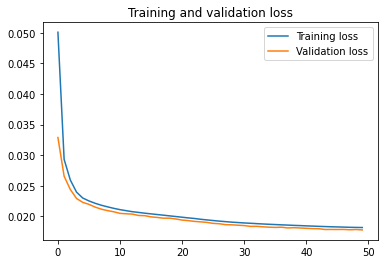

In [20]:
run_model(model, epochs, batch_size, x_train, x_test)

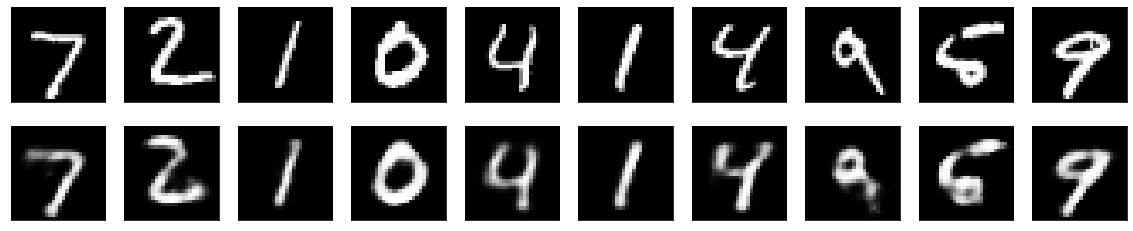

In [21]:
## Comparison betwen original images (above) and their respective reconstructions (bellow)

plot_compare(model, x_test)

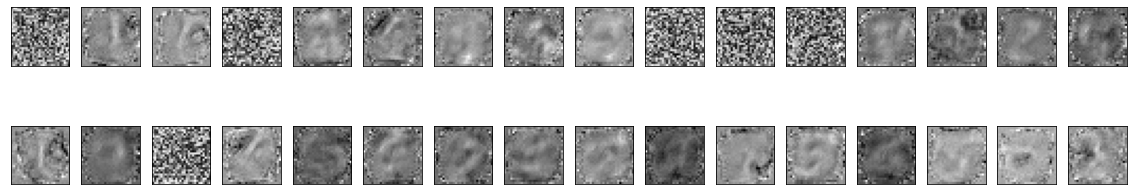

In [22]:
## Hidden layer visualization

plot_hidden_rep(model, examples=16)

### Model 3
Model details:
- 3 hidden layers
  - 64 -> 32 -> 64

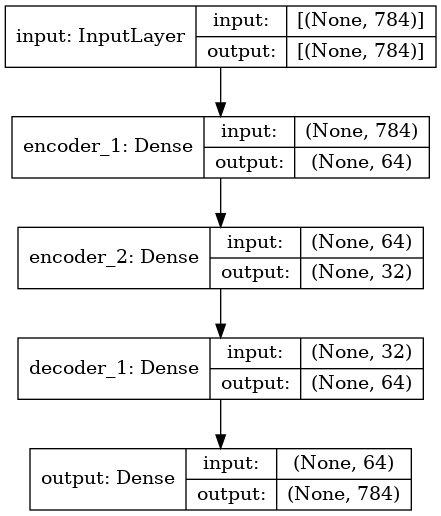

In [23]:
encoder_layer = [
    {
        "units": 64,
        "activation": "relu",
        "name": "encoder_1"
    },
    {
        "units": 32,
        "activation": "relu",
        "name": "encoder_2"
    },
]

decoder_layer = [
    {
        "units": 64,
        "activation": "relu",
        "name": "decoder_1"
    }
]

model = create_model(input_shape, encoder_layer, decoder_layer, "Adam")
plot_model(model, show_shapes=True)

Epoch 1/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0621 - val_loss: 0.0202
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0191 - val_loss: 0.0150
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0149 - val_loss: 0.0133
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0133 - val_loss: 0.0121
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0123 - val_loss: 0.0113
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0115 - val_loss: 0.0109
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0110 - val_loss: 0.0105
Epoch 8/50
938/938 [==============================] - 1s 2ms/step - loss: 0.0105 - val_loss: 0.0099
Epoch 9/50
938/938 [==============================] - 1s 2ms/step - loss: 0.0102 - val_loss: 0.0097
Epoch 10/50
938/938 [==============================] - 1s 2ms/step - loss: 0.0099 - val_loss: 0.0096

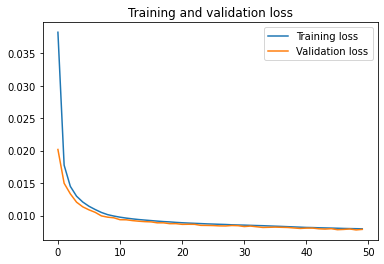

In [24]:
run_model(model, epochs, batch_size, x_train, x_test)

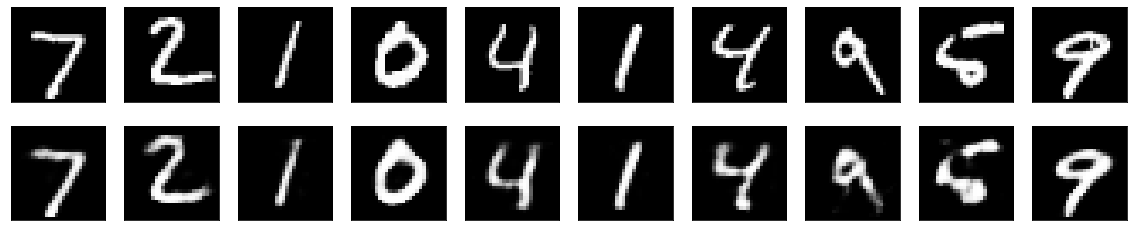

In [25]:
## Comparison betwen original images (above) and their respective reconstructions (bellow)

plot_compare(model, x_test)

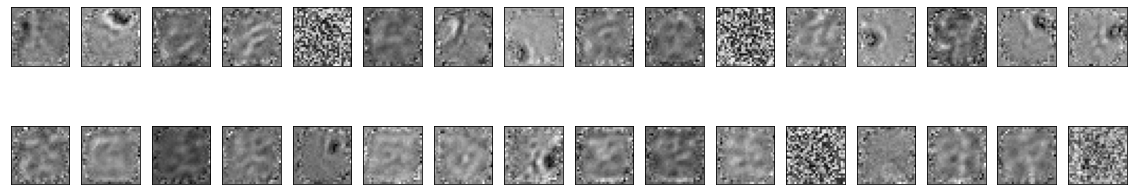

In [26]:
## Hidden layer visualization

plot_hidden_rep(model, examples=16)

### Model 4
Model details:
- 5 hidden layers
  - 64 -> 32 -> 16 -> 32 -> 64

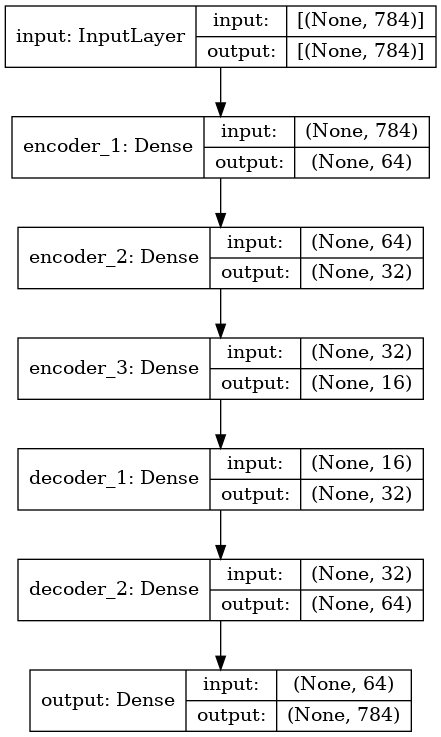

In [28]:
encoder_layer = [
    {
        "units": 64,
        "activation": "relu",
        "name": "encoder_1"
    },
    {
        "units": 32,
        "activation": "relu",
        "name": "encoder_2"
    },
    {
        "units": 16,
        "activation": "relu",
        "name": "encoder_3"
    },
]

decoder_layer = [
    {
        "units": 32,
        "activation": "relu",
        "name": "decoder_1"
    },
    {
        "units": 64,
        "activation": "relu",
        "name": "decoder_2"
    }
]

model = create_model(input_shape, encoder_layer, decoder_layer, "Adam")
plot_model(model, show_shapes=True)

Epoch 1/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0670 - val_loss: 0.0307
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0287 - val_loss: 0.0245
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0243 - val_loss: 0.0223
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0224 - val_loss: 0.0208
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0207 - val_loss: 0.0194
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0195 - val_loss: 0.0190
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0189 - val_loss: 0.0180
Epoch 8/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0183 - val_loss: 0.0176
Epoch 9/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0179 - val_loss: 0.0172
Epoch 10/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0175 - val_loss: 0.0170

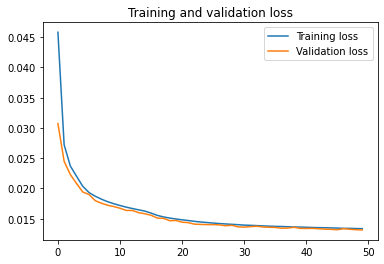

In [29]:
run_model(model, epochs, batch_size, x_train, x_test)

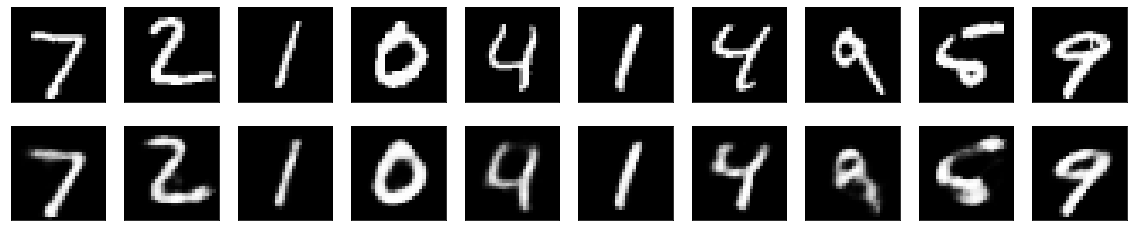

In [30]:
## Comparison betwen original images (above) and their respective reconstructions (bellow)

plot_compare(model, x_test)

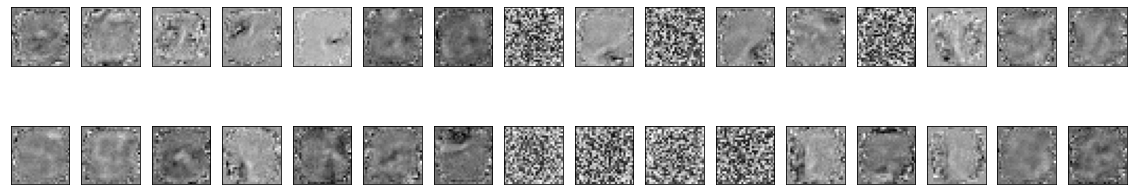

In [31]:
## Hidden layer visualization

plot_hidden_rep(model, examples=16)

### Model 5
Model details:
- 5 hidden layers
  - 128 -> 64 -> 32 -> 64 -> 128

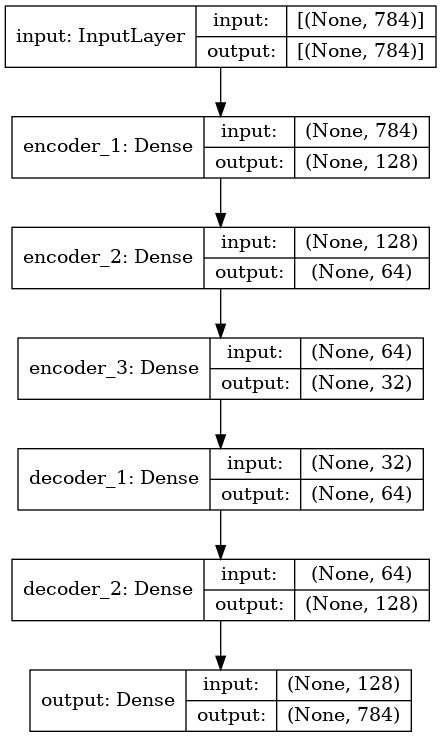

In [33]:
encoder_layer = [
    {
        "units": 128,
        "activation": "relu",
        "name": "encoder_1"
    },
    {
        "units": 64,
        "activation": "relu",
        "name": "encoder_2"
    },
    {
        "units": 32,
        "activation": "relu",
        "name": "encoder_3"
    },
]

decoder_layer = [
    {
        "units": 64,
        "activation": "relu",
        "name": "decoder_1"
    },
    {
        "units": 128,
        "activation": "relu",
        "name": "decoder_2"
    }
]

model = create_model(input_shape, encoder_layer, decoder_layer, "Adam")
plot_model(model, show_shapes=True)

Epoch 1/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0596 - val_loss: 0.0213
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0200 - val_loss: 0.0161
Epoch 3/50
938/938 [==============================] - 2s 3ms/step - loss: 0.0157 - val_loss: 0.0134
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0135 - val_loss: 0.0122
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0124 - val_loss: 0.0115
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0115 - val_loss: 0.0106
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0109 - val_loss: 0.0102
Epoch 8/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0103 - val_loss: 0.0097
Epoch 9/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0099 - val_loss: 0.0095
Epoch 10/50
938/938 [==============================] - 2s 2ms/step - loss: 0.0096 - val_loss: 0.0091

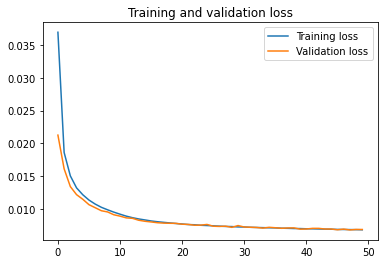

In [34]:
run_model(model, epochs, batch_size, x_train, x_test)

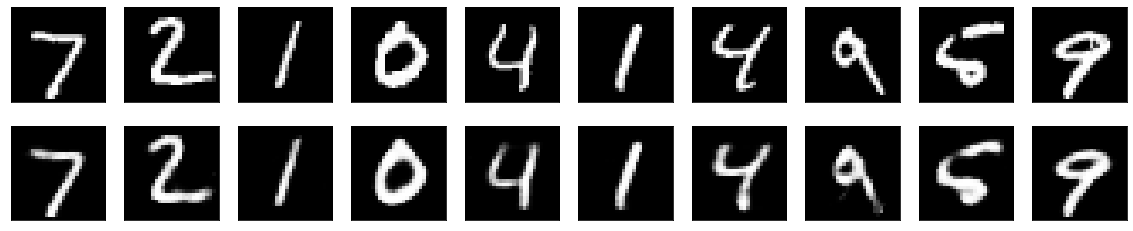

In [35]:
## Comparison betwen original images (above) and their respective reconstructions (bellow)

plot_compare(model, x_test)

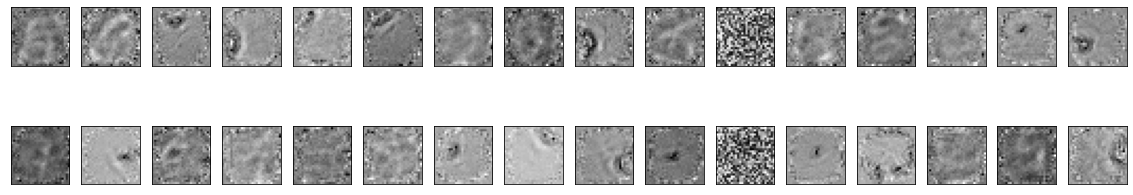

In [36]:
## Hidden layer visualization

plot_hidden_rep(model, examples=16)

### Model 6
Model details:
- 5 hidden layers
  - 256 -> 128 -> 64 -> 128 -> 256

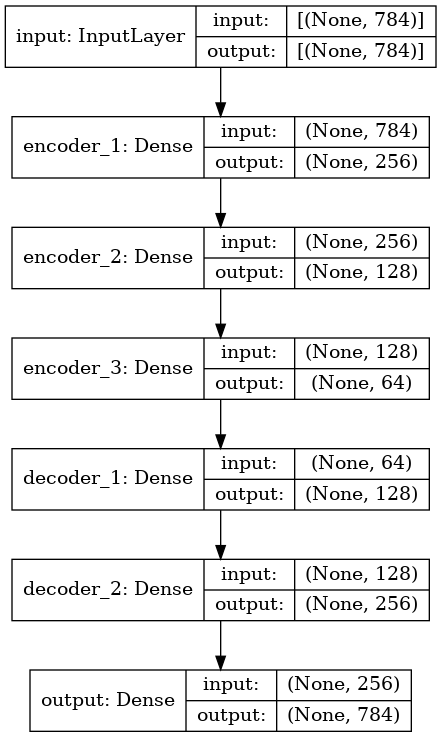

In [37]:
encoder_layer = [
    {
        "units": 256,
        "activation": "relu",
        "name": "encoder_1"
    },
    {
        "units": 128,
        "activation": "relu",
        "name": "encoder_2"
    },
    {
        "units": 64,
        "activation": "relu",
        "name": "encoder_3"
    },
]

decoder_layer = [
    {
        "units": 128,
        "activation": "relu",
        "name": "decoder_1"
    },
    {
        "units": 256,
        "activation": "relu",
        "name": "decoder_2"
    }
]

model = create_model(input_shape, encoder_layer, decoder_layer, "Adam")
plot_model(model, show_shapes=True)

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0477 - val_loss: 0.0139
Epoch 2/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0129 - val_loss: 0.0099
Epoch 3/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0097 - val_loss: 0.0081
Epoch 4/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0080 - val_loss: 0.0071
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0071 - val_loss: 0.0065
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 8/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 9/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 10/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0051 - val_loss: 0.0048

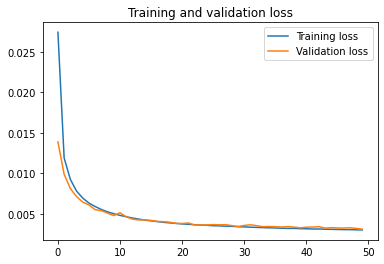

In [38]:
run_model(model, epochs, batch_size, x_train, x_test)

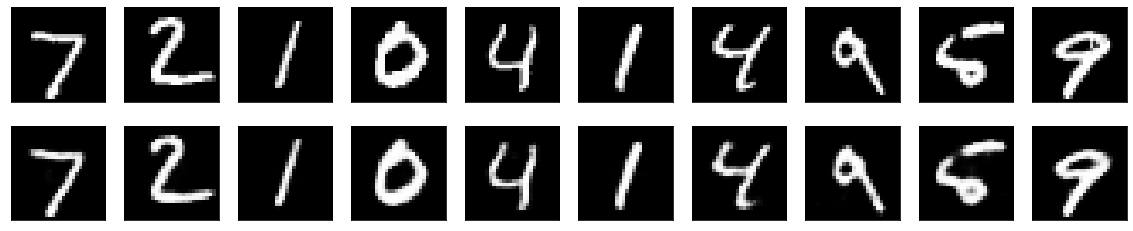

In [39]:
## Comparison betwen original images (above) and their respective reconstructions (bellow)

plot_compare(model, x_test)

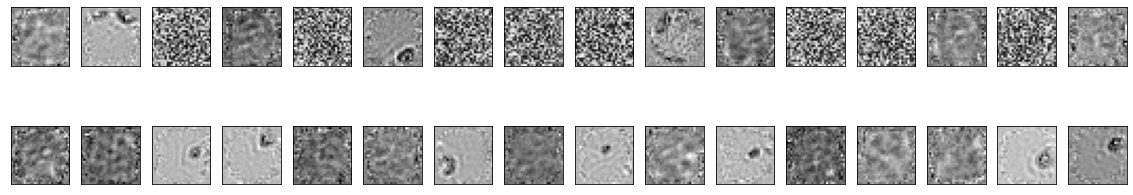

In [40]:
## Hidden layer visualization

plot_hidden_rep(model, examples=16)

## Conclusions

Since all the models were trained with the same specs, except hidden layer sizes and numbers, it's possible to analyse the effect of this quantities on the model quality.

Observing the trainings, more layers with more neurons results in a slower and heavy training process, consuming more computing power, but yielding better results as seen in the last model. Lesser layers, but with more neuron each, yields on a good model with average training time.

More layers doesn't always mean a better model, as seen in model number 4. Even though this model has 5 layers intead of 3 layers as in model number 3, because of low neuron count, the results are worse than model 3.

At last, analysing the last model, it's possible to see that the digit reconstructions are very close to the original samples, with very little loss. The hidden neuron representations, even though are just noise in some examples, can show some patterns and shapes that the network learned from the examples presented.